In [2]:
import spacy
import pandas as pd
from pathlib import Path
import little_mallet_wrapper as lmw

In [3]:
nlp = spacy.load("en_core_web_trf")
stories_folder = '/Users/ryan/Projects/mental-health/story/'
path_to_mallet = '/Users/ryan/mallet-2.0.8/bin/mallet'
story_files = list(Path(stories_folder).glob('*.txt'))

In [156]:
story_files

[PosixPath('/Users/ryan/Projects/mental-health/story/story79.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story45.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story51.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story86.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story92.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story8.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story9.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story93.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story87.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story50.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story44.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story78.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story52.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/story/story46.txt'),
 PosixPath('/Users/ryan/Projects/mental-health/sto

In [157]:
story = story_files[0]
text = open(story).read()

In [158]:
text

'Losing some-one close to you to suicide is something only those who have experienced it first hand can really understand. - And yet, at a time when everyone is feeling such deep loss, harsh words and accusations are thrown with intent to hurt those who are already trying to comprehend the reality of what has just happened.\n\nEveryone seems to have their own personal views on what events lead to the suicide.- Blame towards others seems to be the easier alternative, in order to hide their own deep self doubt that maybe, they themselves could have or should have done or said something to change the present circumstances.\n\nNo one is to blame. - This is not murder or an accident. - This is suicide, the end result of mental illness. - Whether the illness was long-term or short-term, at the time of suicide, a thought disorder was present.\n\nWhy are we so afraid to accept that a loved one just wasn’t thinking straight at the time of suicide’ Their thought pattern is muddled – will I, won’

In [4]:
def test_token(tok):
    if tok.is_stop:
        # print('Stop token', tok.lemma_)
        return False
    if tok.is_punct:
        # print('Punctuation token', tok.lemma_)
        return False
    # print('Token', tok.lemma_)
    return True

In [5]:
corpus = []
story_names = []

for story_file in story_files:
    with open(story_file) as f:
        text = f.read()
        doc = nlp(text)
        processed = ' '.join([token.lemma_.lower() for token in doc if test_token(token)])
        corpus.append(processed)
        story_names.append(story_file.stem)

In [10]:
corpus[0]

'lose close suicide experience hand understand time feel deep loss harsh word accusation throw intent hurt try comprehend reality happen \n\n personal view event lead suicide.- blame easy alternative order hide deep self doubt maybe say change present circumstance \n\n blame murder accident suicide end result mental illness illness long term short term time suicide thought disorder present \n\n afraid accept love think straight time suicide thought pattern muddled will i. final decision final chance million reason thought process accept \n\n blame away hide underlie guilt blame \n\n live gentle soul dream kind loving minute turn irrational irresponsible drain know family experience similar experience witness \n\n death fiance way deal strong desire speak bring awareness similar situation find white wreath association see opportunity positive memory \n\n sadly family way choose blame'

In [11]:
import pickle

pickle.dump(corpus, open('./corpus.pkl', 'wb'))

In [ ]:
# STOP

In [12]:
num_topics = 20 
output = './output/'
topic_keys, topic_distributions = lmw.quick_train_topic_model(
    path_to_mallet,
    output,
    num_topics,
    corpus
)

Importing data...
Complete
Training topic model...


Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 1175
total tokens: 36688
<10> LL/token: -9.048
<20> LL/token: -8.73748
<30> LL/token: -8.61252
<40> LL/token: -8.53735

0	0.25	know okay people ask question help talk have deal conversation important start suicide situation mean struggle connect prevention awareness listen 
1	0.25	know need like feel well tell try happen let thing support maybe think away kid parent start decision session wait 
2	0.25	family son find home friend problem big doctor learn crisis open sign hand give member death hospital resource call new 
3	0.25	help need thing people support different talk change stay keep good alive proud purpose start medical look certain research strength 
4	0.25	like look think know time realize man kind hard set come hope male boundary condition act process fix able idea 
5	0.25	experience live bit little people hard learn life find amazing away step thought thing helpful tough sort turn survive peer 
6	

Complete


In [13]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 suicide die ask people pain question stop prevention help research
1 	 know okay get think talk bad let kid say right
2 	 hospital police medication attempt death liam logan admit jump wife
3 	 time life think day help love way try change want
4 	 get black huge blow hear note hole quick carry weight
5 	 bit little big forward start grow shift step world present
6 	 school get high head job crisis sit teacher bed distress
7 	 walk sign social decision eye see heart talk etc mind
8 	 year time take day tell son family work friend life
9 	 people help lot know come talk feel story share say
10 	 life thing way hard work hope change try experience deal
11 	 nami hope family friend support find resource member call story
12 	 disorder anxiety trauma develop bipolar depression treatment diagnose experience symptom
13 	 sean come night mike drink mate sleep gay blah alcohol
14 	 love child boy remember young girl larry hope sorry pain
15 	 yeah thank pain time like today hear good work c

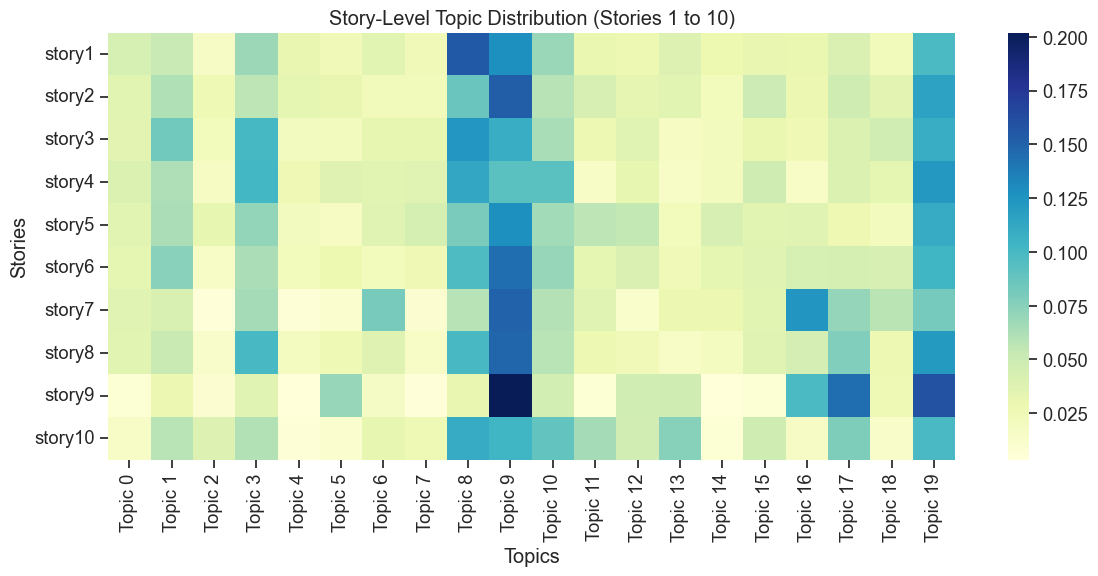

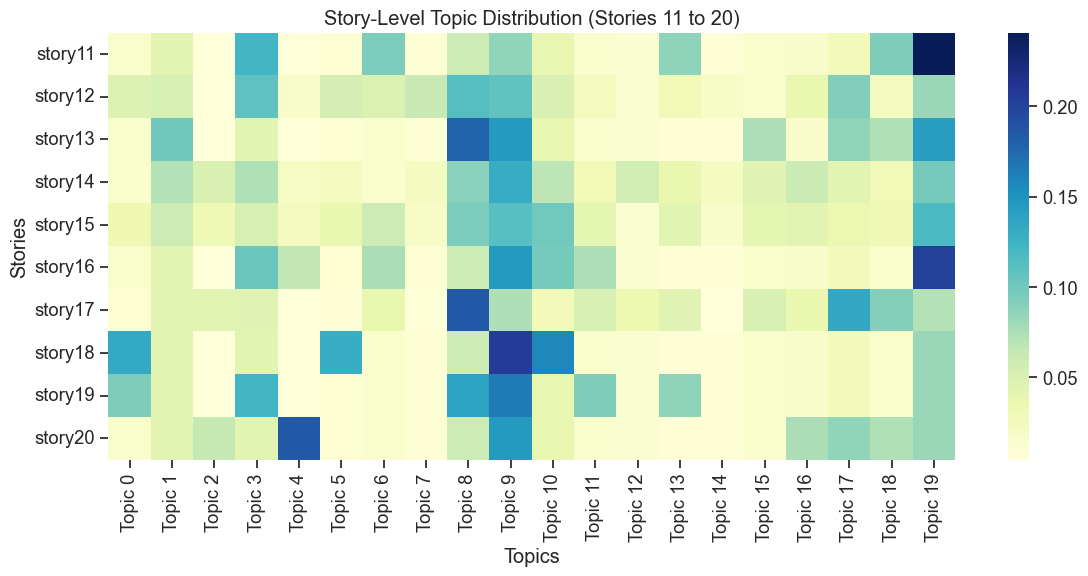

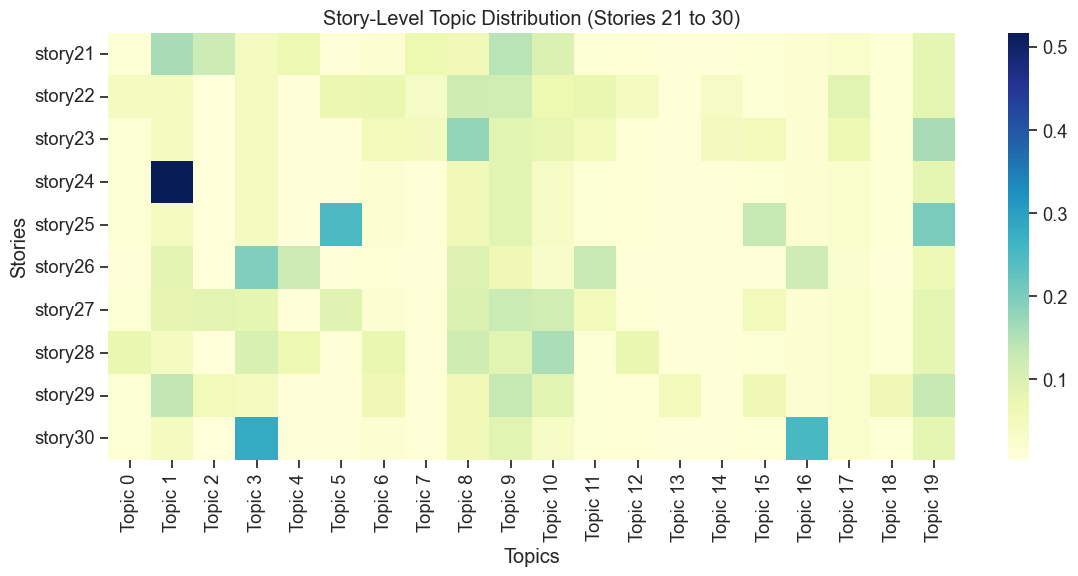

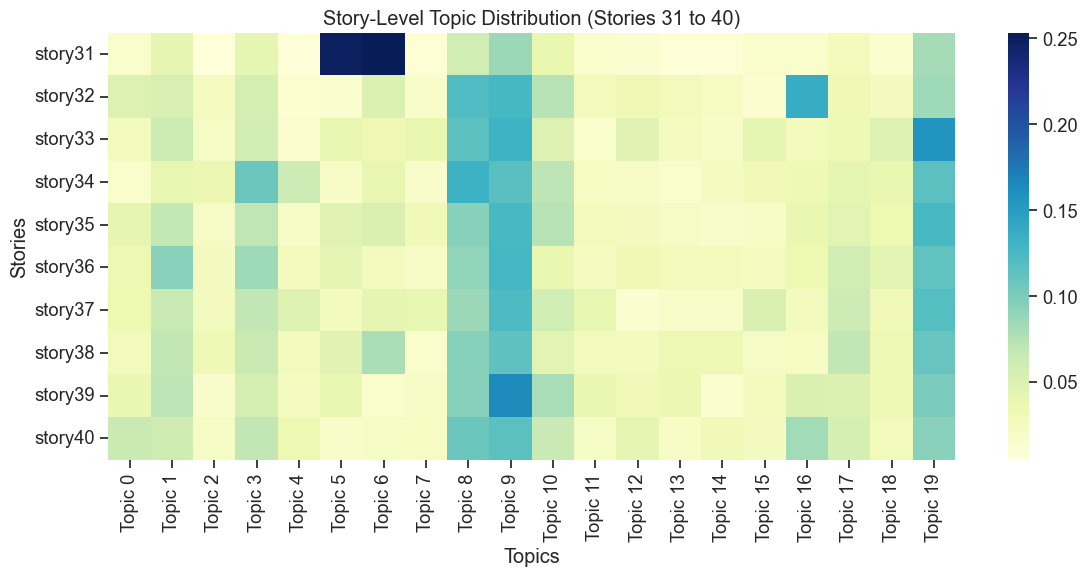

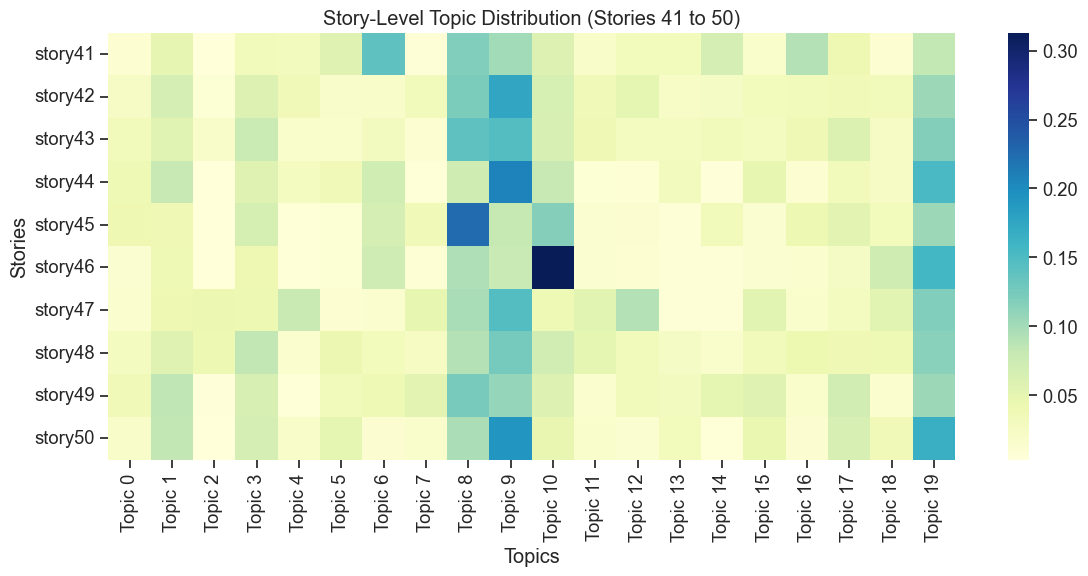

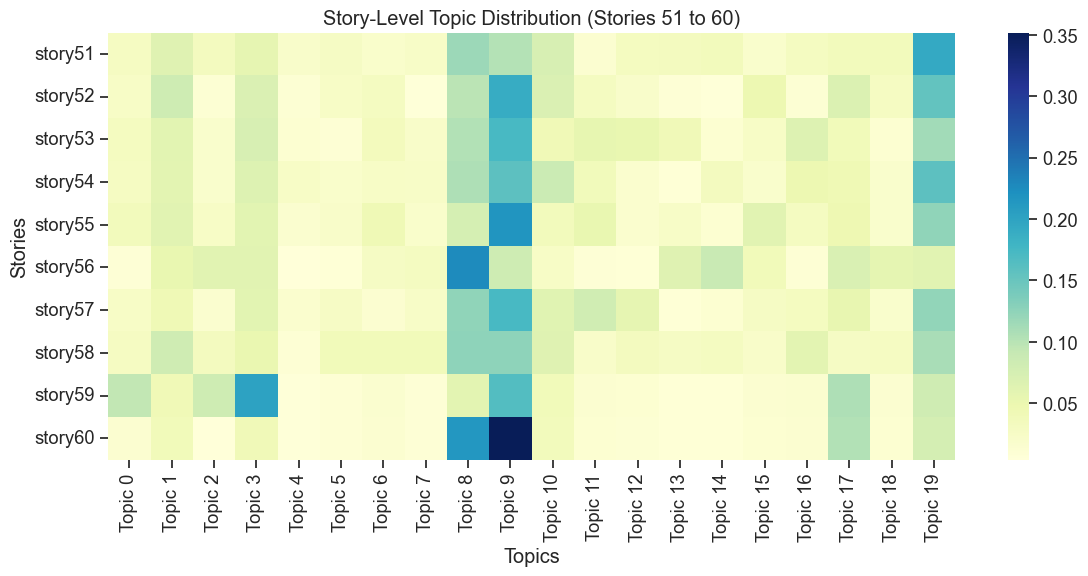

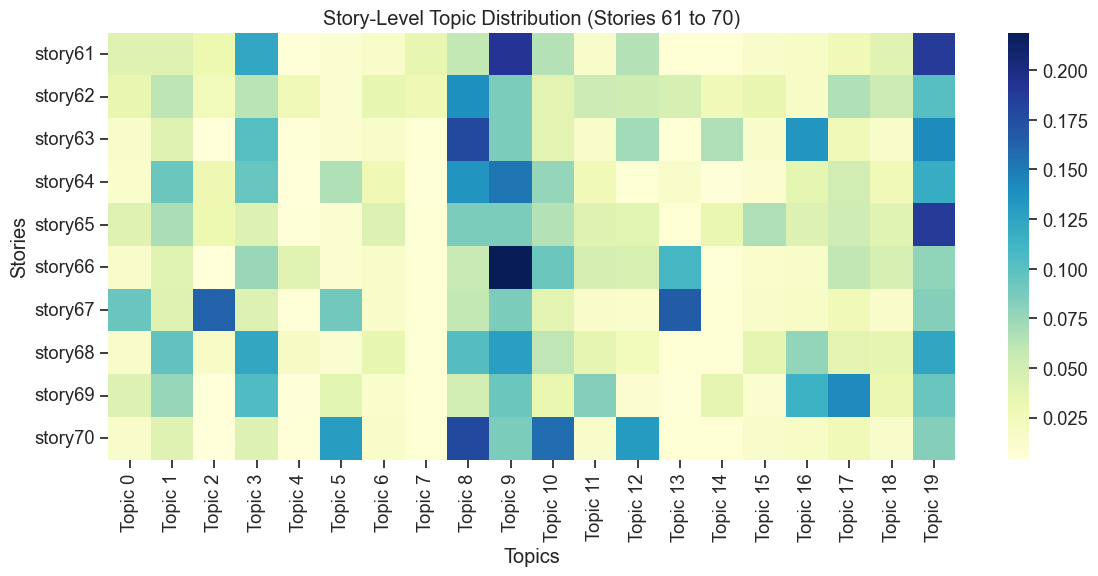

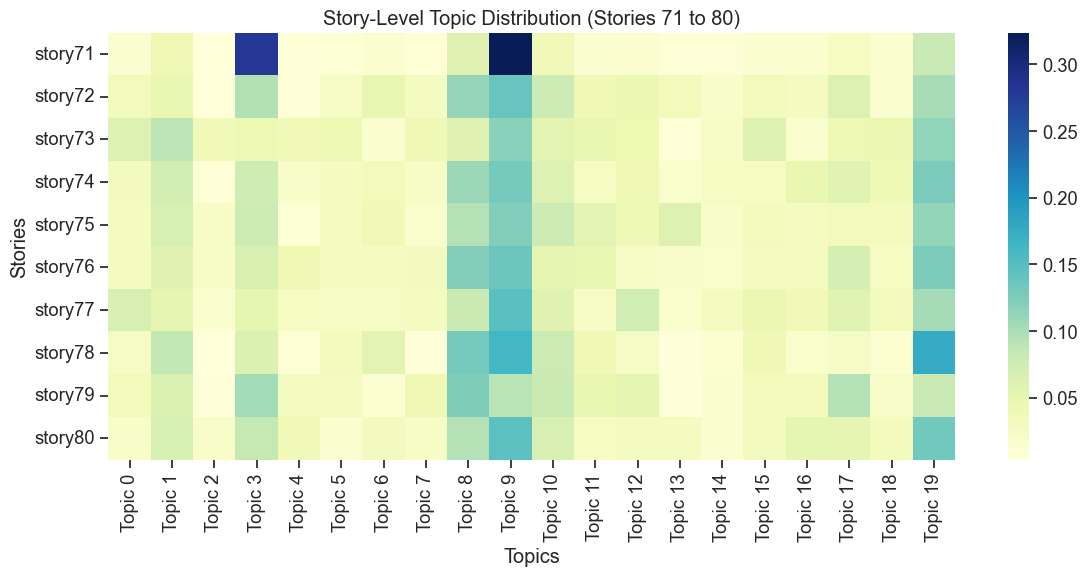

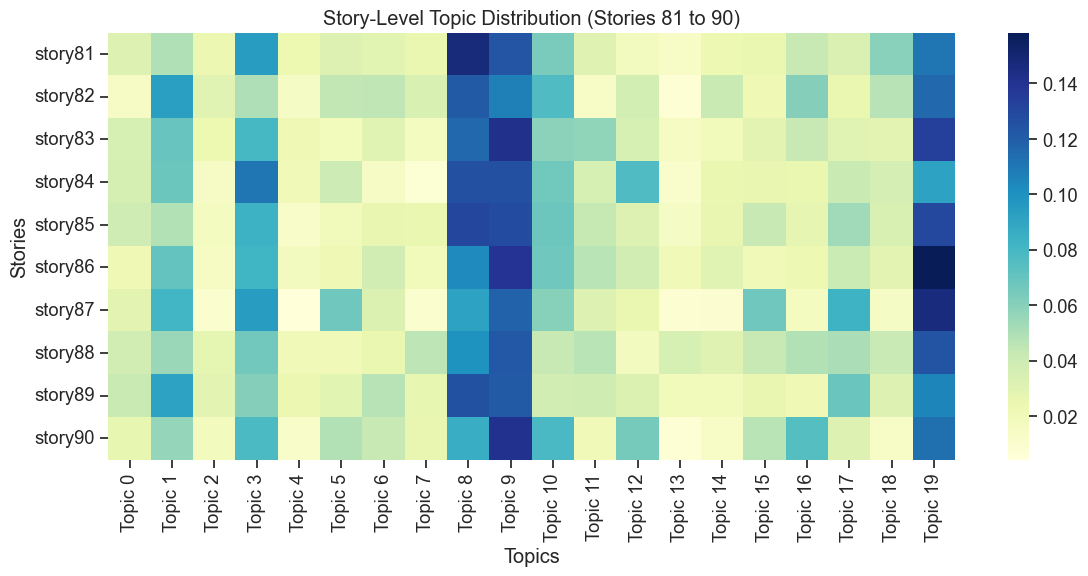

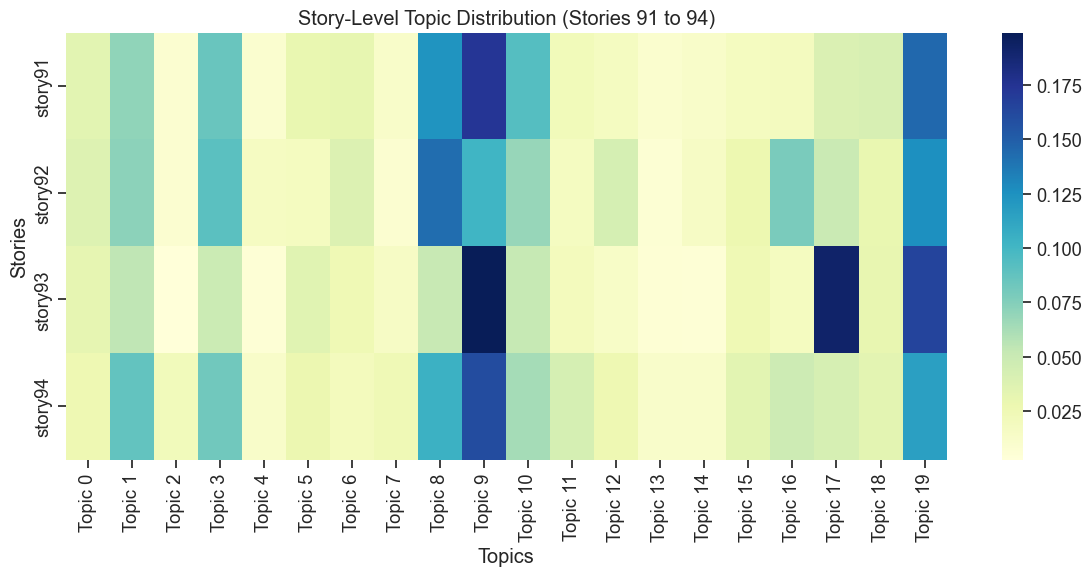

In [14]:
sentence_to_story = []
for story_file in story_files:
    with open(story_file) as f:
        text = f.read()
        doc = list(nlp(text).sents)  
        sentence_to_story.extend([story_file.stem] * len(doc))  

from collections import defaultdict
import numpy as np

story_topic_accumulator = defaultdict(list)
for sent_story, topic_vec in zip(sentence_to_story, topic_distributions):
    story_topic_accumulator[sent_story].append(topic_vec)

story_level_topic_vectors = {
    story: np.mean(distributions, axis=0)
    for story, distributions in story_topic_accumulator.items()
}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

story_level_df = pd.DataFrame.from_dict(story_level_topic_vectors, orient='index')
story_level_df.index.name = 'story'

story_level_df_sorted = story_level_df.copy()
story_level_df_sorted['story_num'] = story_level_df_sorted.index.str.extract('(\d+)', expand=False).astype(int)
story_level_df_sorted = story_level_df_sorted.sort_values('story_num')
story_level_df_sorted.index = ['story' + str(num) for num in story_level_df_sorted['story_num']]
story_level_df_sorted = story_level_df_sorted.drop(columns='story_num')

num_stories = story_level_df_sorted.shape[0]
for start in range(0, num_stories, 10):
    end = min(start + 10, num_stories)
    subset_df = story_level_df_sorted.iloc[start:end]
    plt.figure(figsize=(12, 6))
    sns.heatmap(subset_df, cmap='YlGnBu', xticklabels=[f"Topic {i}" for i in range(subset_df.shape[1])], yticklabels=True)
    plt.title(f"Story-Level Topic Distribution (Stories {start+1} to {end})")
    plt.xlabel("Topics")
    plt.ylabel("Stories")
    plt.tight_layout()
    plt.show()

In [16]:
for p, d in lmw.get_top_docs(corpus, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.2524 year ago brother pass 
 go attempt 
 spirit 
 woman faith say 
 son thing 
 check hospital 
 want share faith nami 
 get sit seat today 
 venessa abram 
 suicide survivor sibling survivor 
 diagnose major depressive disorder 
 anxiety complex bereavement disorder 
 ptsd brother death 
 brother old brother 
 u.s. army decorate veteran 
 pass way complete suicide 
 mental health journey begin teenager 
 diagnose depression 
 treat teen 
 spill adulthood 
 thing tough suicidal 
 suicidal ideation 
 begin inpatient adult 
 
 diagnose major depressive disorder 
 begin learn stigma 
 know 
 know 
 family talk mental health 
 talk suicide 
 fast forward brother pass 
 old brother pass 
 advocate 
 attempt 
 sixth time pass away 
 thank god 
 brother pass dig deep 
 know generational 
 
 young 
 learn sibling 
 attempt time 
 thing know 
 begin search research 
 begin learn history generation 
 family mother 
 father side family 
 father recover alcoholic 30 year 
 ask father brother pa

In [15]:
import os

output_dirs = ['./output', './output_15', './output_25', './output_30']
for d in output_dirs:
    os.makedirs(d, exist_ok=True)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 1175
total tokens: 36688
<10> LL/token: -8.90338
<20> LL/token: -8.64643
<30> LL/token: -8.50861
<40> LL/token: -8.43675

0	0.33333	care think okay son self find help dad see call end mean sleep take situation age away kind lose cry 
1	0.33333	health mental take illness problem find home struggle challenge leave issue life system disorder mean depression stop anxiety brother drink 
2	0.33333	life people story experience share point journey help live hard end try beautiful voice impact especially join save amazing hear 
3	0.33333	day year time kind old world like long moment future hold medication depression bring ago hour happen perspective show minute 
4	0.33333	suicide people life change help pain know conversation prevention come different world matter hear big believe thing guess alive happen 
5	0.33333	know school lot time get word thing happen walk high use see long pass different find relationship wron

Complete


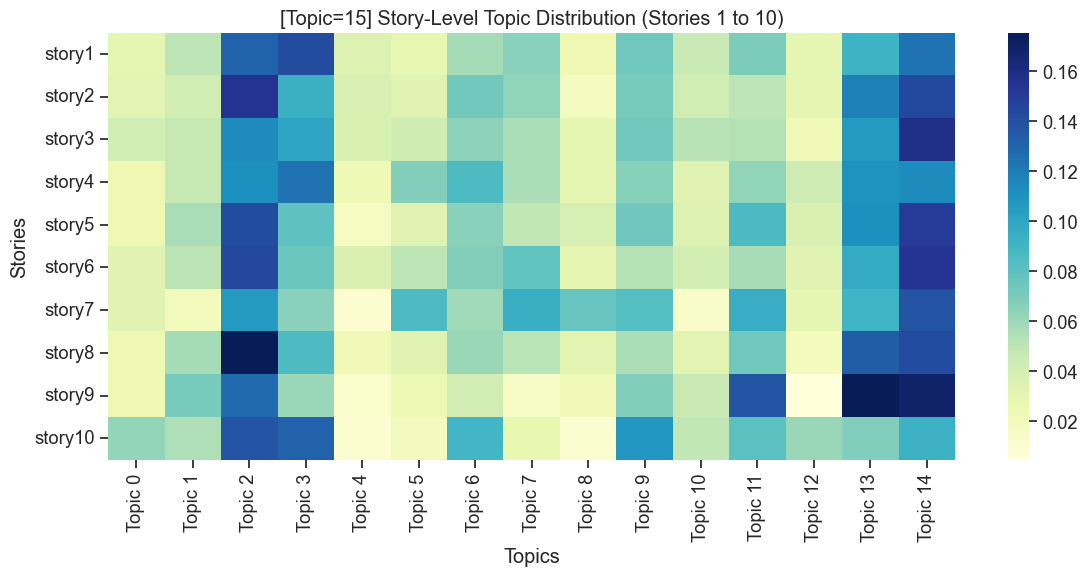

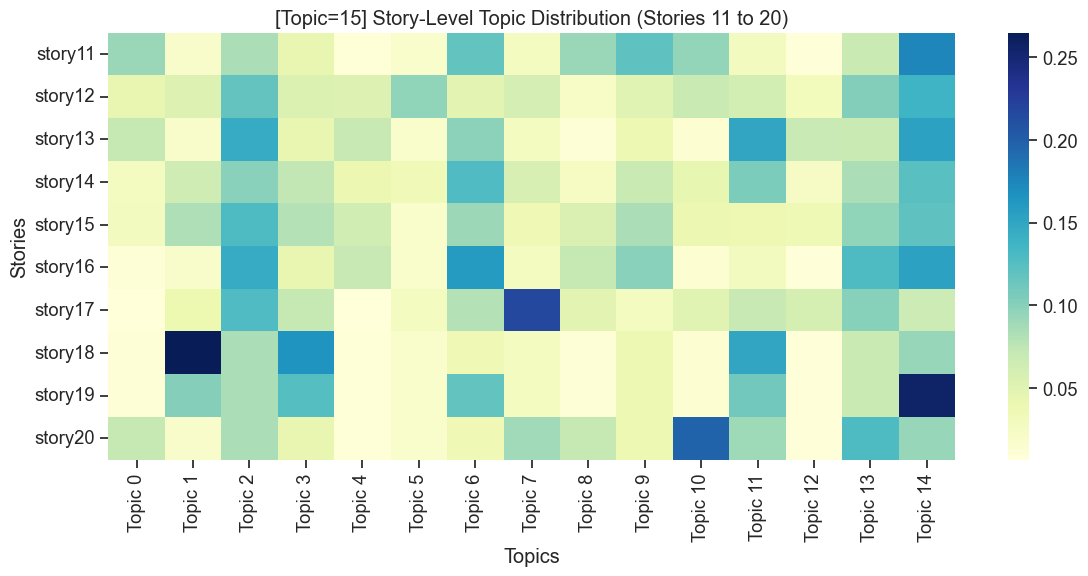

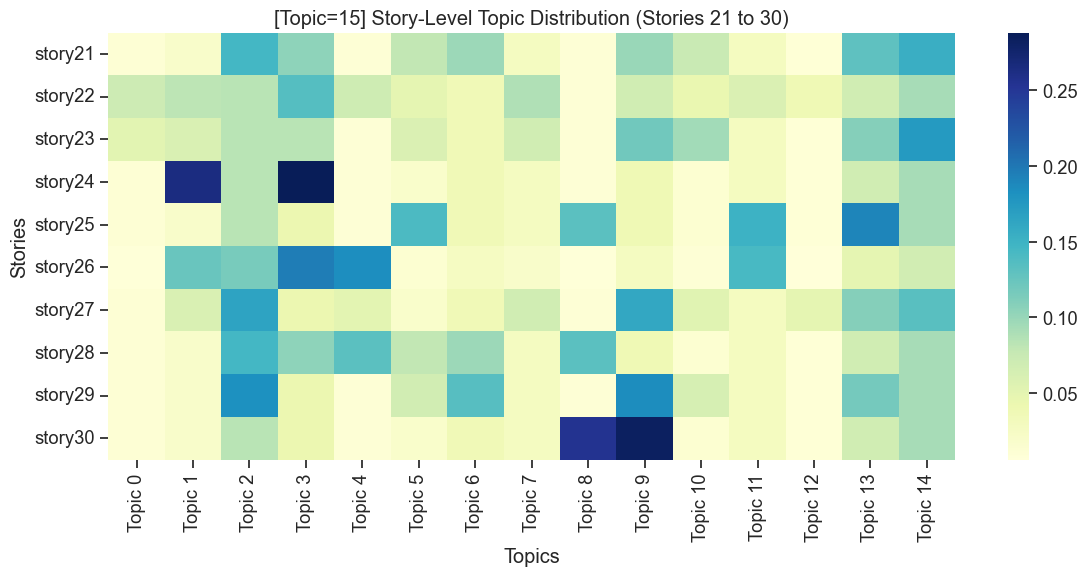

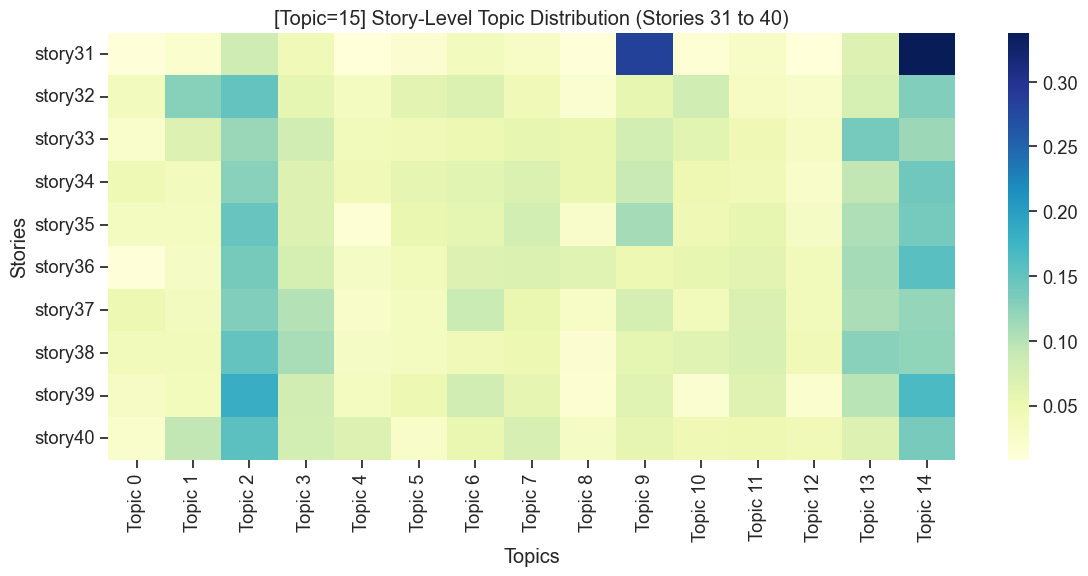

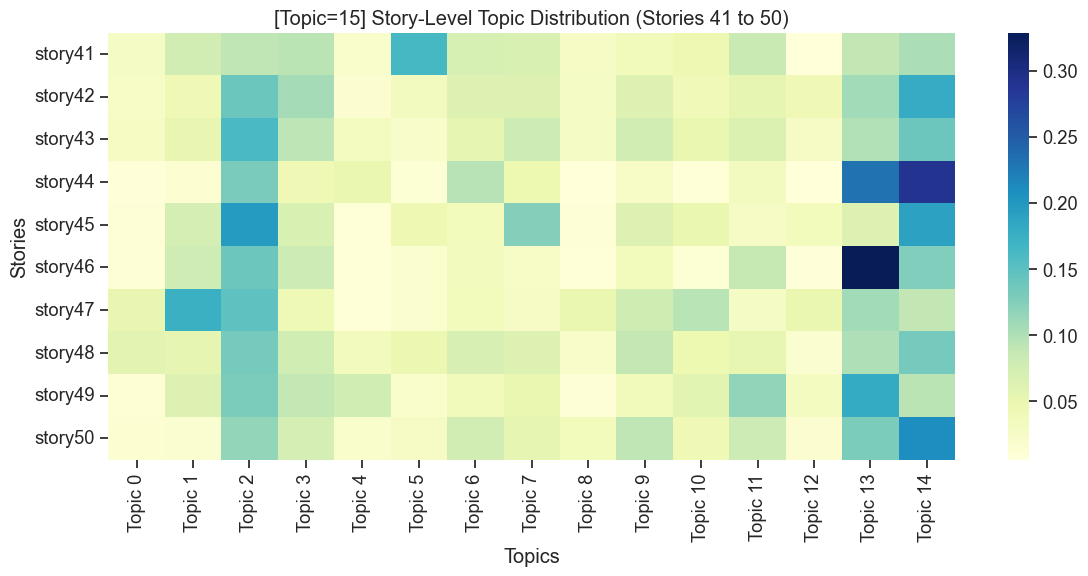

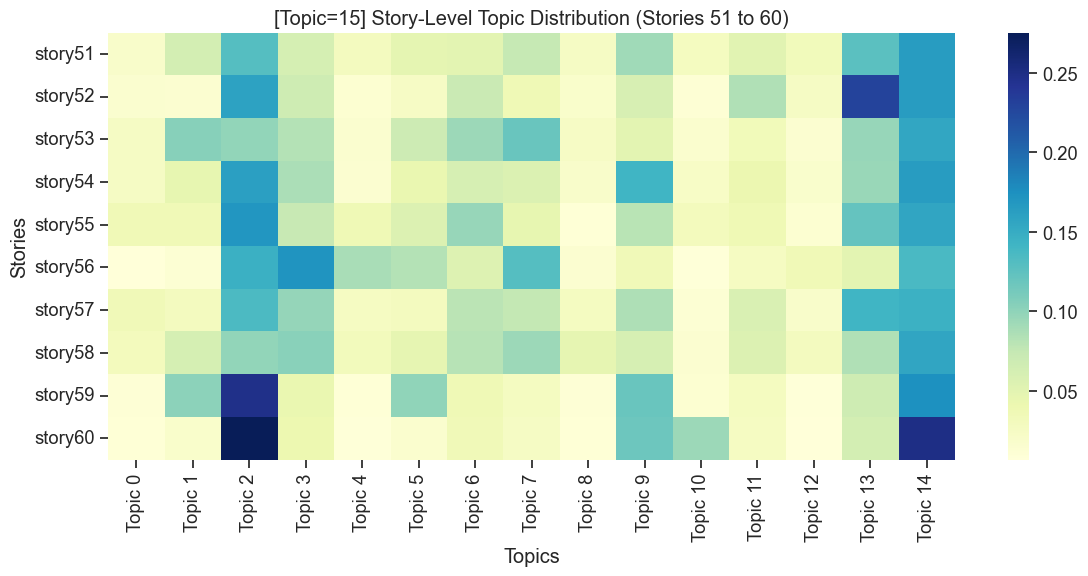

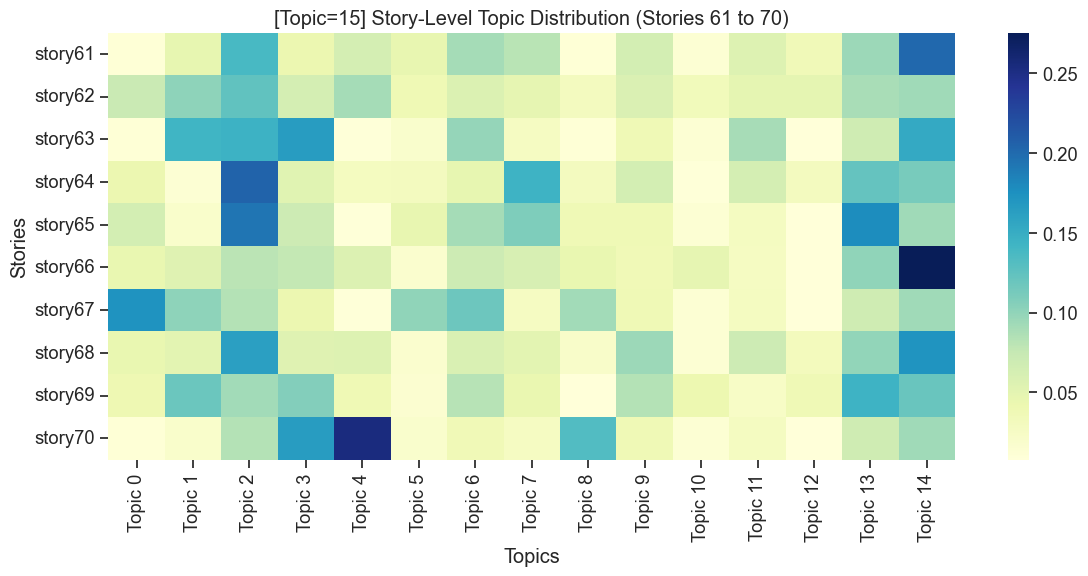

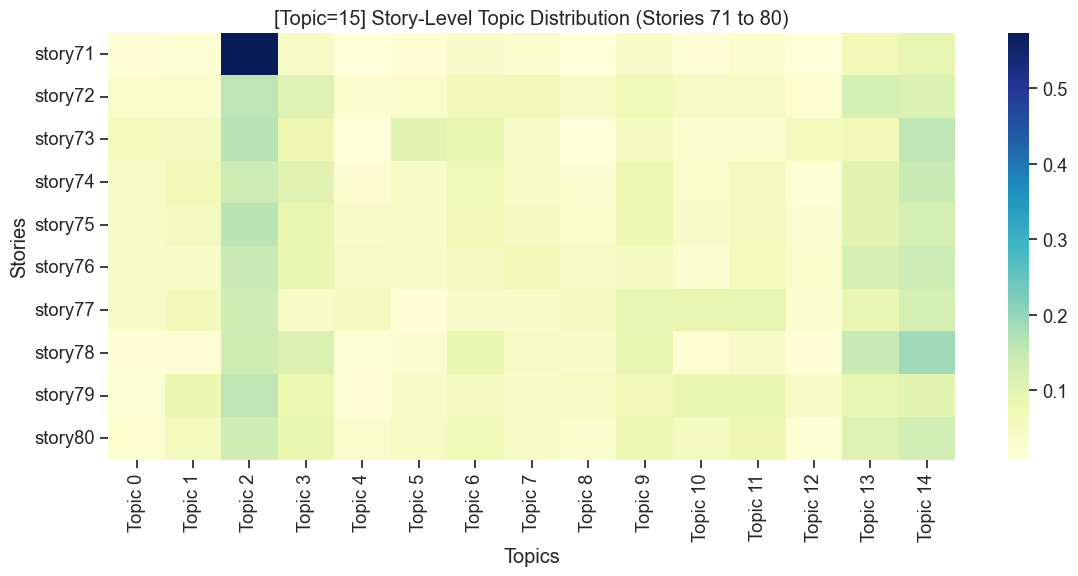

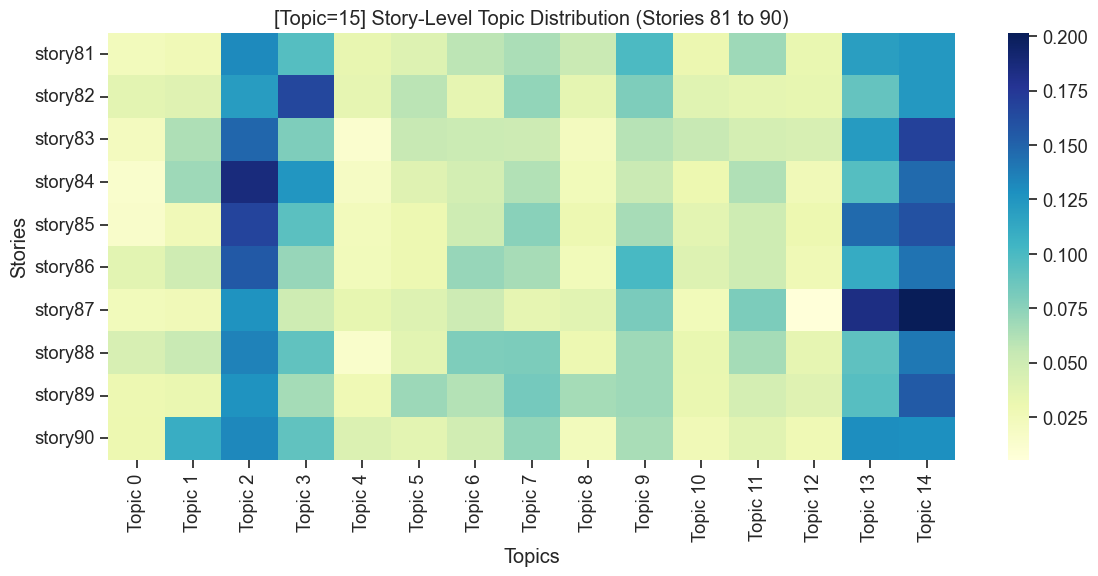

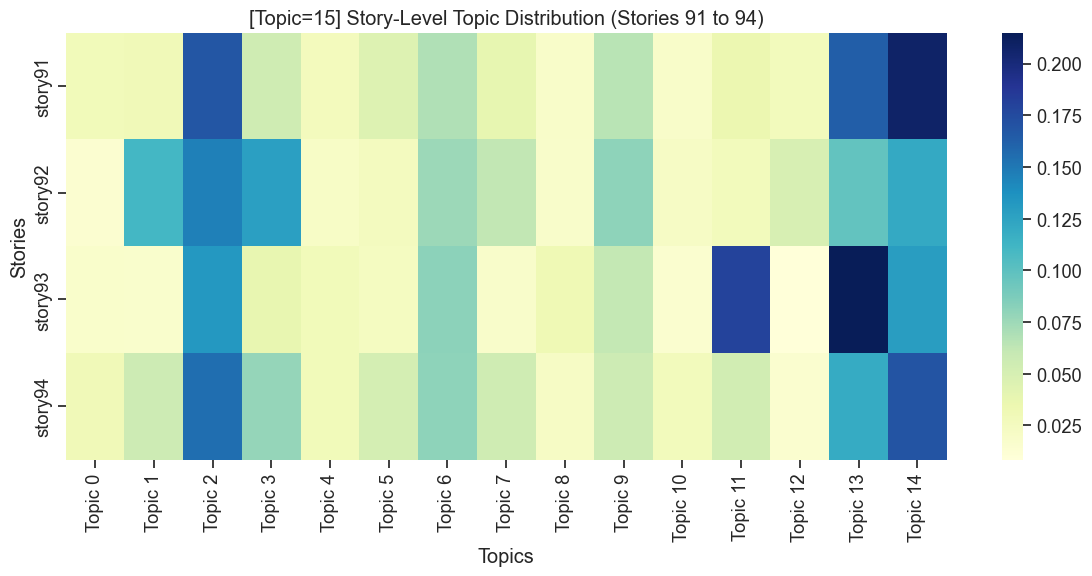

In [18]:
import pickle

num_topics_15 = 15
output_15 = './output_15/'
topic_keys_15, topic_distributions_15 = lmw.quick_train_topic_model(
    path_to_mallet,
    output_15,
    num_topics_15,
    corpus
)

sentence_to_story_15 = sentence_to_story
story_topic_accumulator_15 = defaultdict(list)
for sent_story, topic_vec in zip(sentence_to_story_15, topic_distributions_15):
    story_topic_accumulator_15[sent_story].append(topic_vec)

story_level_topic_vectors_15 = {
    story: np.mean(distributions, axis=0)
    for story, distributions in story_topic_accumulator_15.items()
}
story_level_df_15 = pd.DataFrame.from_dict(story_level_topic_vectors_15, orient='index')
story_level_df_15.index.name = 'story'

# 排序并画图
df_sorted_15 = story_level_df_15.copy()
df_sorted_15['story_num'] = df_sorted_15.index.str.extract('(\d+)', expand=False).astype(int)
df_sorted_15 = df_sorted_15.sort_values('story_num')
df_sorted_15.index = ['story' + str(num) for num in df_sorted_15['story_num']]
df_sorted_15 = df_sorted_15.drop(columns='story_num')

for start in range(0, df_sorted_15.shape[0], 10):
    end = min(start + 10, df_sorted_15.shape[0])
    subset_df = df_sorted_15.iloc[start:end]
    plt.figure(figsize=(12, 6))
    sns.heatmap(subset_df, cmap='YlGnBu', xticklabels=[f"Topic {i}" for i in range(num_topics_15)], yticklabels=True)
    plt.title(f"[Topic=15] Story-Level Topic Distribution (Stories {start+1} to {end})")
    plt.xlabel("Topics")
    plt.ylabel("Stories")
    plt.tight_layout()
    plt.show


Importing data...
Complete
Training topic model...


Mallet LDA: 25 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 1175
total tokens: 36688
<10> LL/token: -9.18508
<20> LL/token: -8.88054
<30> LL/token: -8.73212
<40> LL/token: -8.66148

0	0.2	thing time like suicidal think speak thought different know matter lot important survive kind ideation realize distress amazing long choice 
1	0.2	year old day hard job meet pass home time decision get realize light leave wake try bed away take remember 
2	0.2	sit think stay listen like child break stigma alive word morning use take watch join sign family describe advice young 
3	0.2	life day end moment learn see find way person talk walk room man save need community basically safe parent start 
4	0.2	health mental bit little illness hospital start system physical sort open challenge certain study teach hope national focus education faith 
5	0.2	say son know dad friend talk give place kind cry call phone big teacher mom navigate suffer mum male sister 
6	0.2	suicide people attempt p

Complete


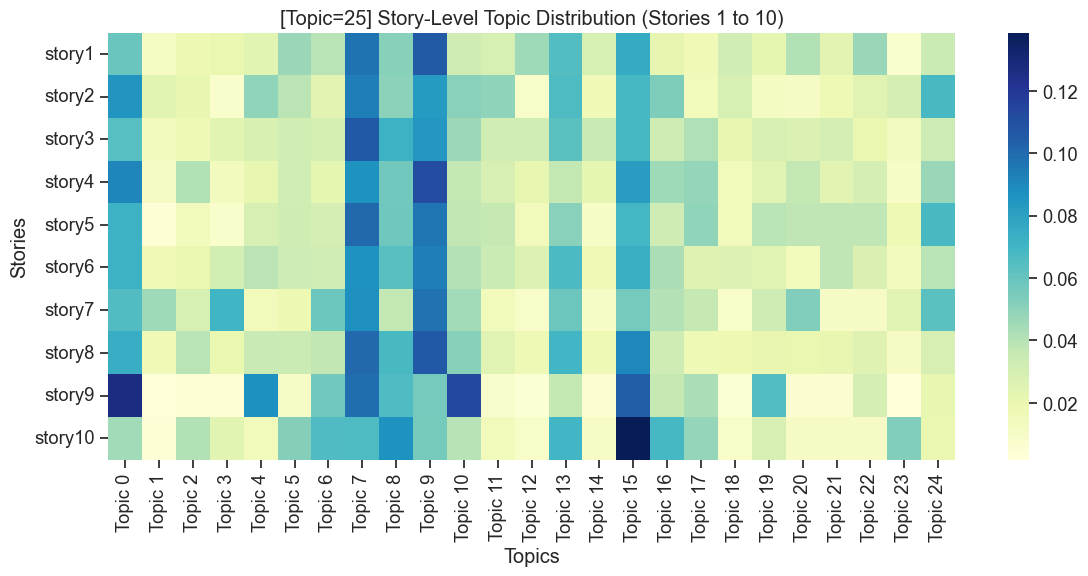

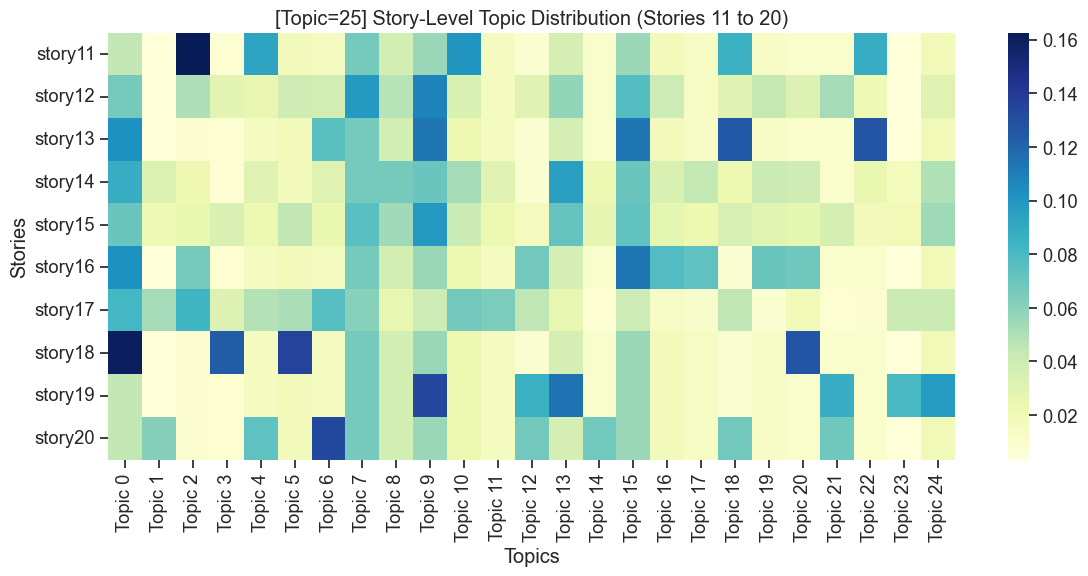

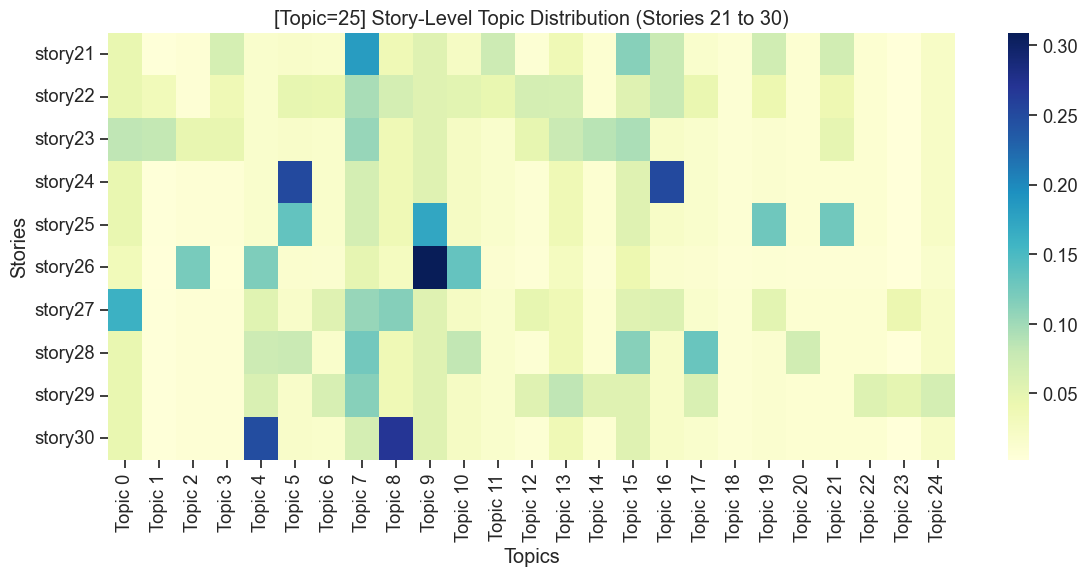

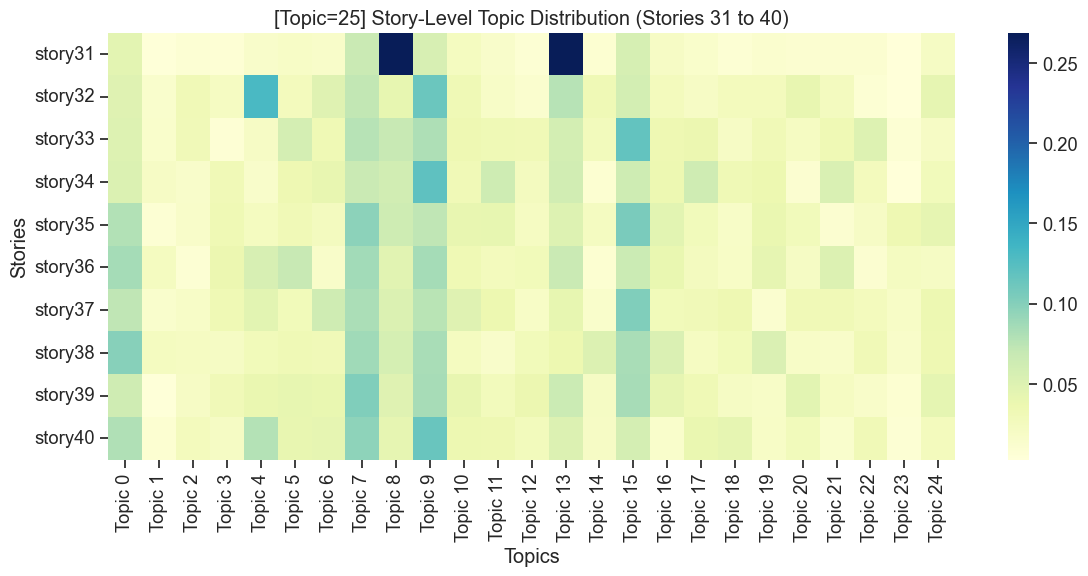

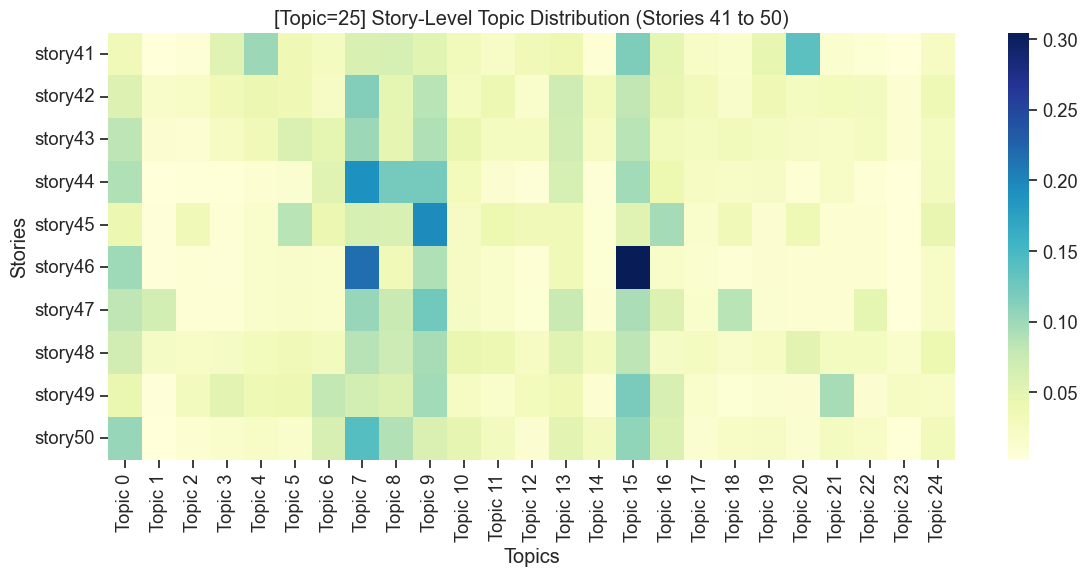

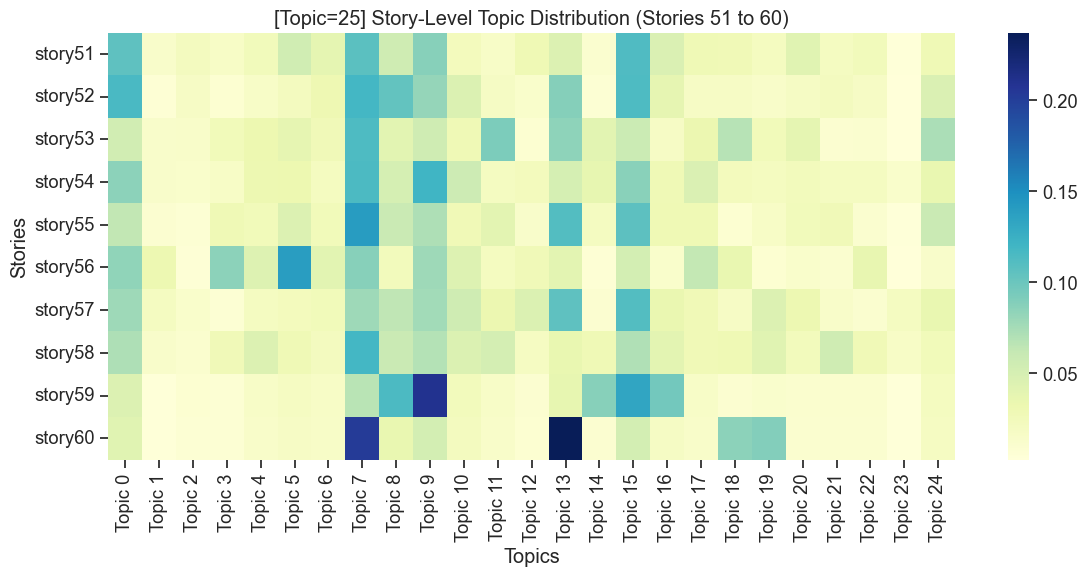

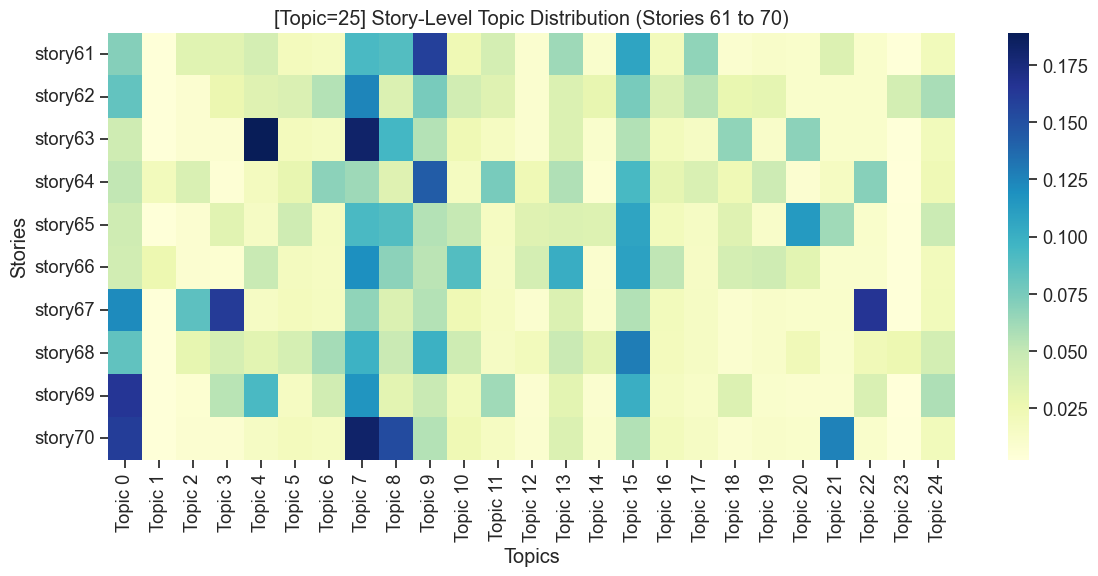

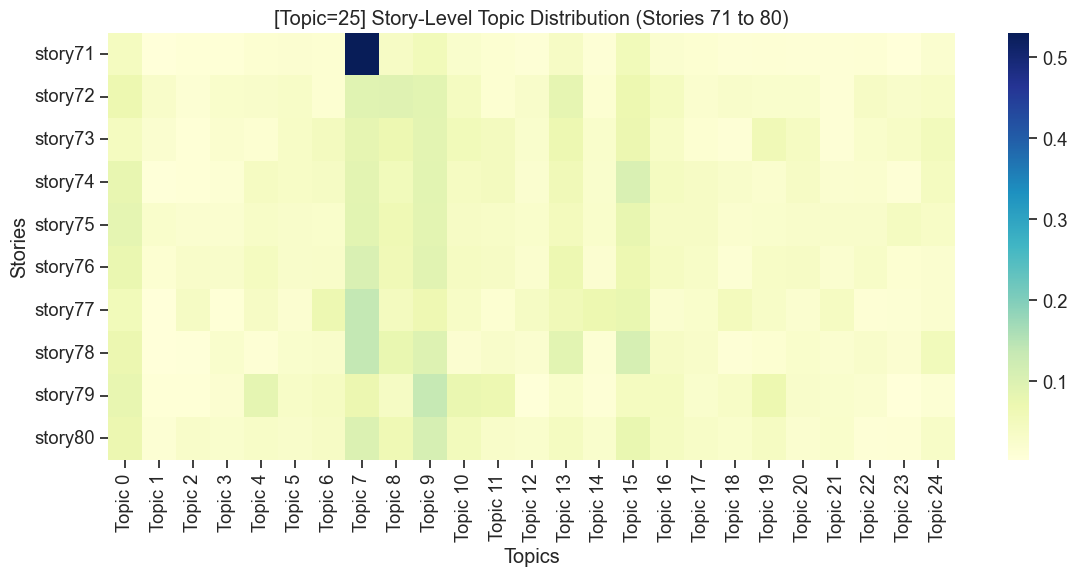

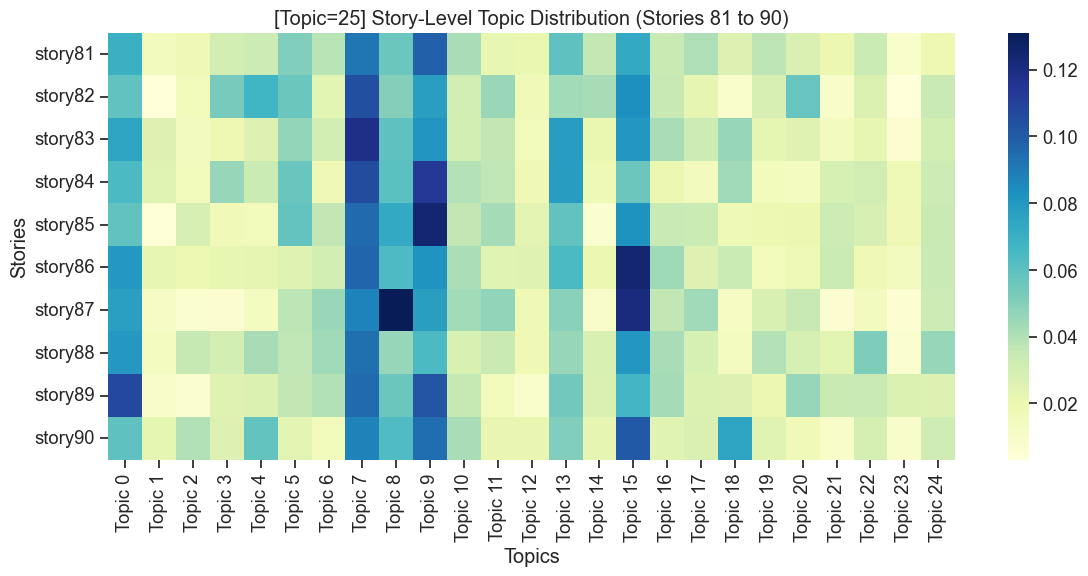

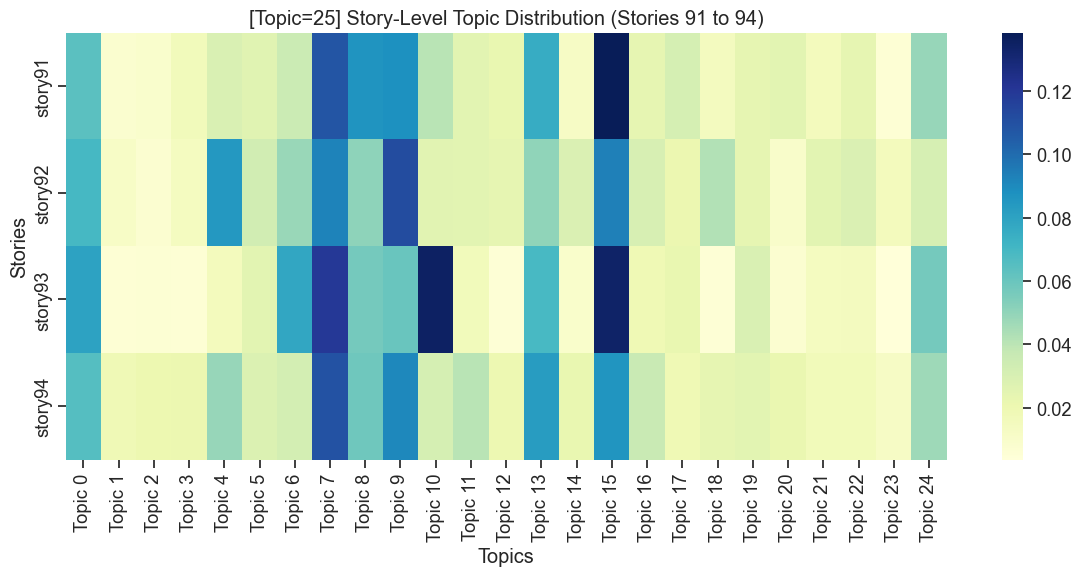

In [19]:
num_topics_25 = 25
output_25 = './output_25/'
topic_keys_25, topic_distributions_25 = lmw.quick_train_topic_model(
    path_to_mallet,
    output_25,
    num_topics_25,
    corpus
)

sentence_to_story_25 = sentence_to_story
story_topic_accumulator_25 = defaultdict(list)
for sent_story, topic_vec in zip(sentence_to_story_25, topic_distributions_25):
    story_topic_accumulator_25[sent_story].append(topic_vec)

story_level_topic_vectors_25 = {
    story: np.mean(distributions, axis=0)
    for story, distributions in story_topic_accumulator_25.items()
}
story_level_df_25 = pd.DataFrame.from_dict(story_level_topic_vectors_25, orient='index')
story_level_df_25.index.name = 'story'

df_sorted_25 = story_level_df_25.copy()
df_sorted_25['story_num'] = df_sorted_25.index.str.extract('(\d+)', expand=False).astype(int)
df_sorted_25 = df_sorted_25.sort_values('story_num')
df_sorted_25.index = ['story' + str(num) for num in df_sorted_25['story_num']]
df_sorted_25 = df_sorted_25.drop(columns='story_num')

for start in range(0, df_sorted_25.shape[0], 10):
    end = min(start + 10, df_sorted_25.shape[0])
    subset_df = df_sorted_25.iloc[start:end]
    plt.figure(figsize=(12, 6))
    sns.heatmap(subset_df, cmap='YlGnBu', xticklabels=[f"Topic {i}" for i in range(num_topics_25)], yticklabels=True)
    plt.title(f"[Topic=25] Story-Level Topic Distribution (Stories {start+1} to {end})")
    plt.xlabel("Topics")
    plt.ylabel("Stories")
    plt.tight_layout()
    plt.show


Importing data...
Complete
Training topic model...


Mallet LDA: 30 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 1175
total tokens: 36688
<10> LL/token: -9.27114
<20> LL/token: -8.9652
<30> LL/token: -8.849
<40> LL/token: -8.79647

0	0.16667	come life think big point brother get parent conversation sure term pain face stuff shift guess reach challenge charity good 
1	0.16667	think way tell feel situation end matter learn comfortable stop disorder guy bipolar mean absolutely suicidality start session factor fear 
2	0.16667	want look say child kind body talk know wrong mention thing love tell word symptom loss different male act like 
3	0.16667	like feel care self people love world maybe good house able ask anymore study family bad present survive ability drop 
4	0.16667	know thing need away see walk support mum start turn future happen develop normal recognize talk black man calm son 
5	0.16667	story life help share people try change tell use community thing world difficult hold recovery advice hurt touch loud win 
6	0.

Complete


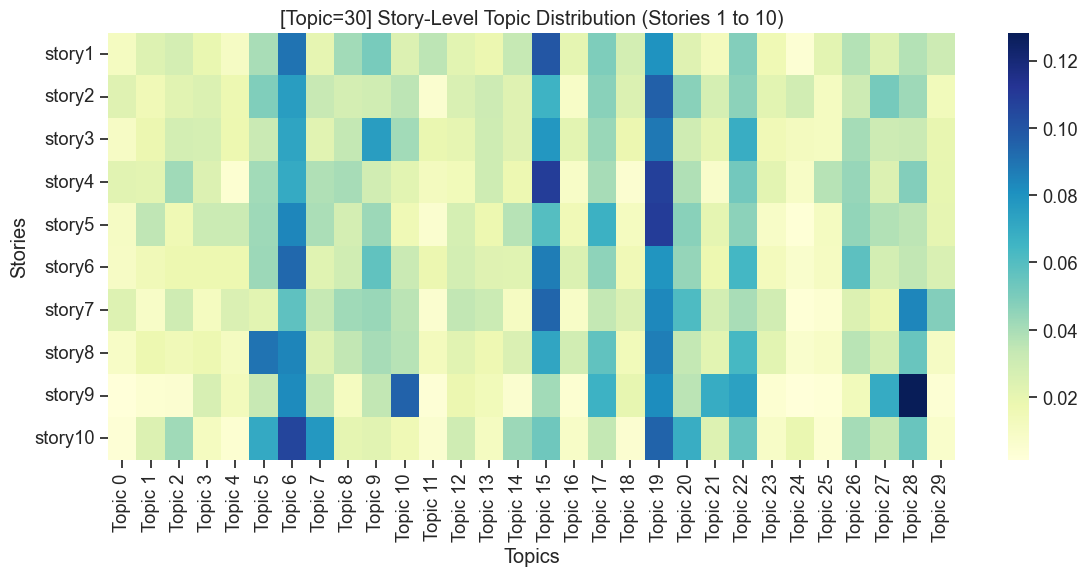

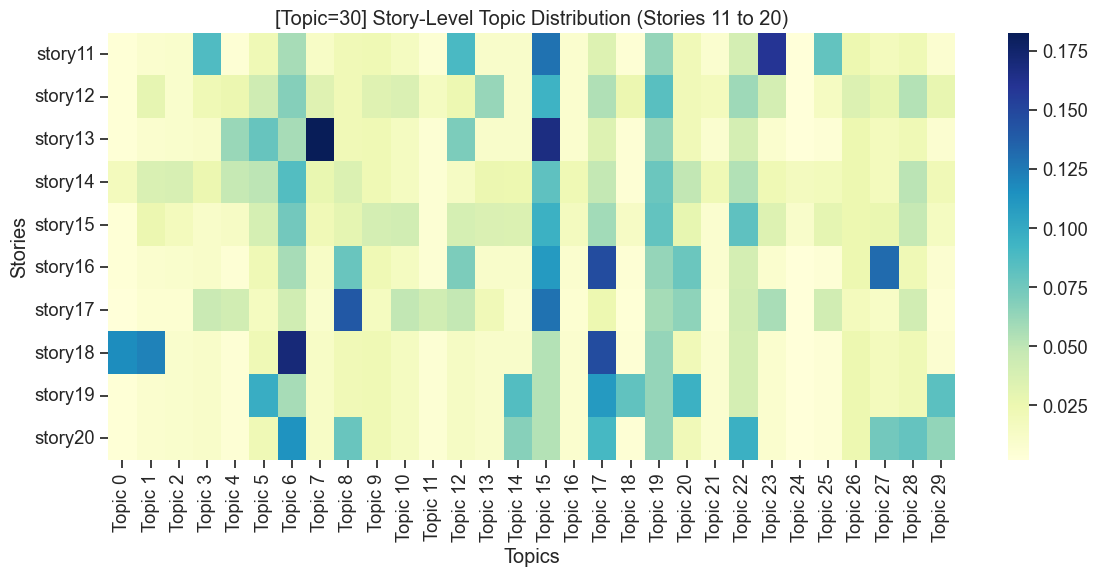

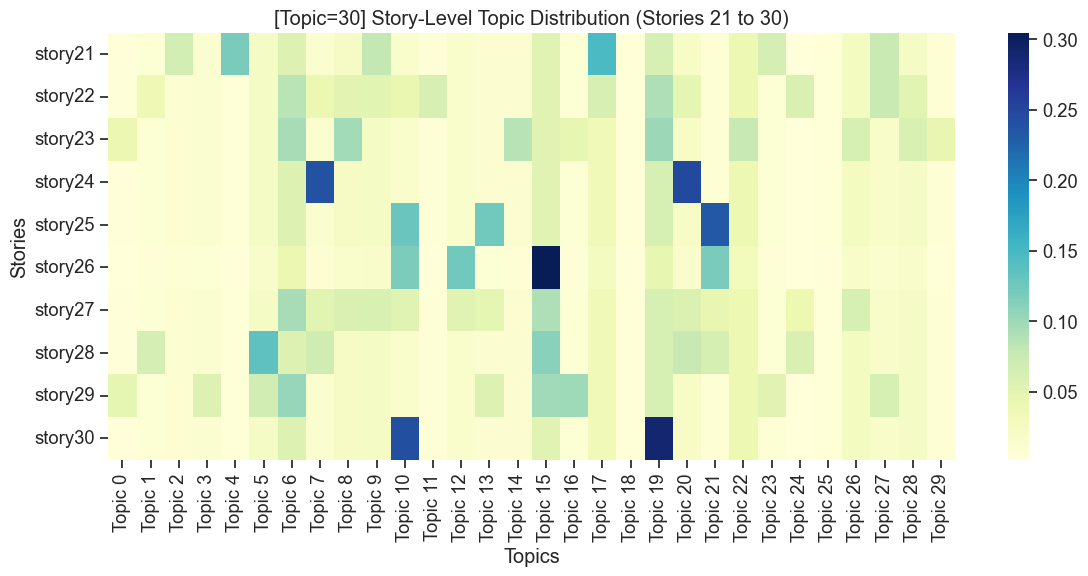

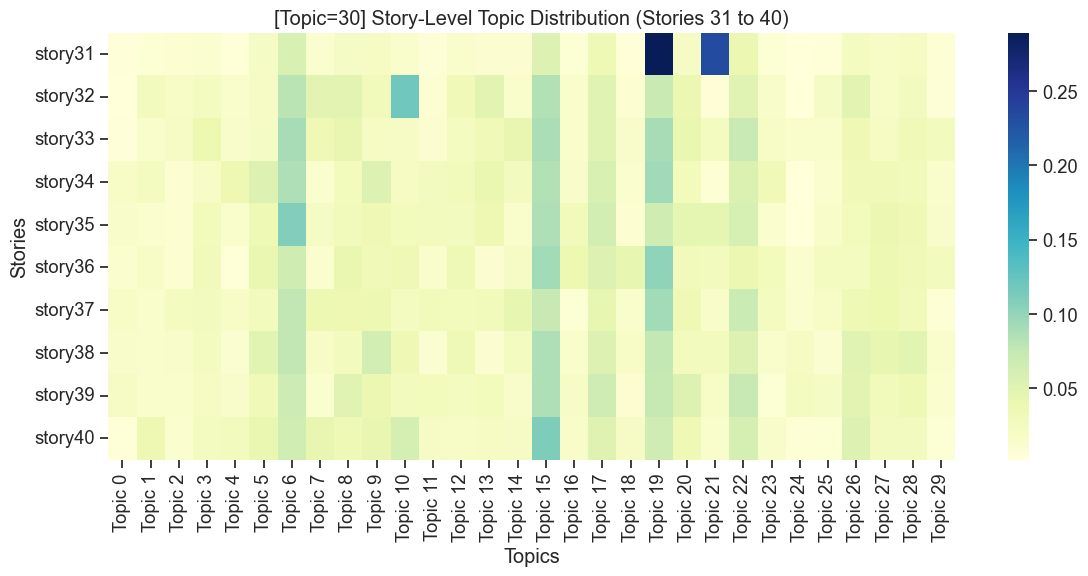

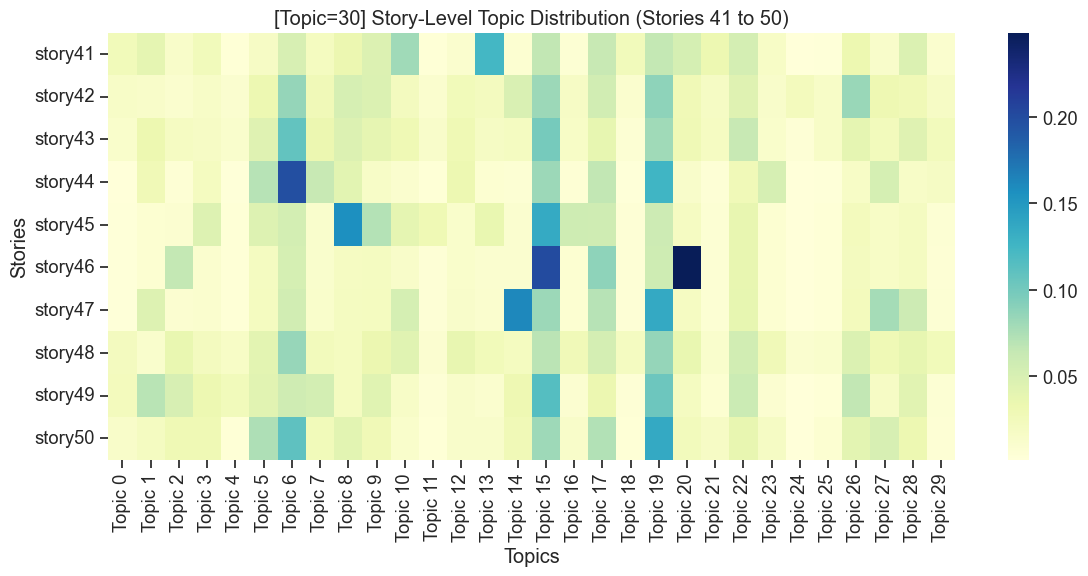

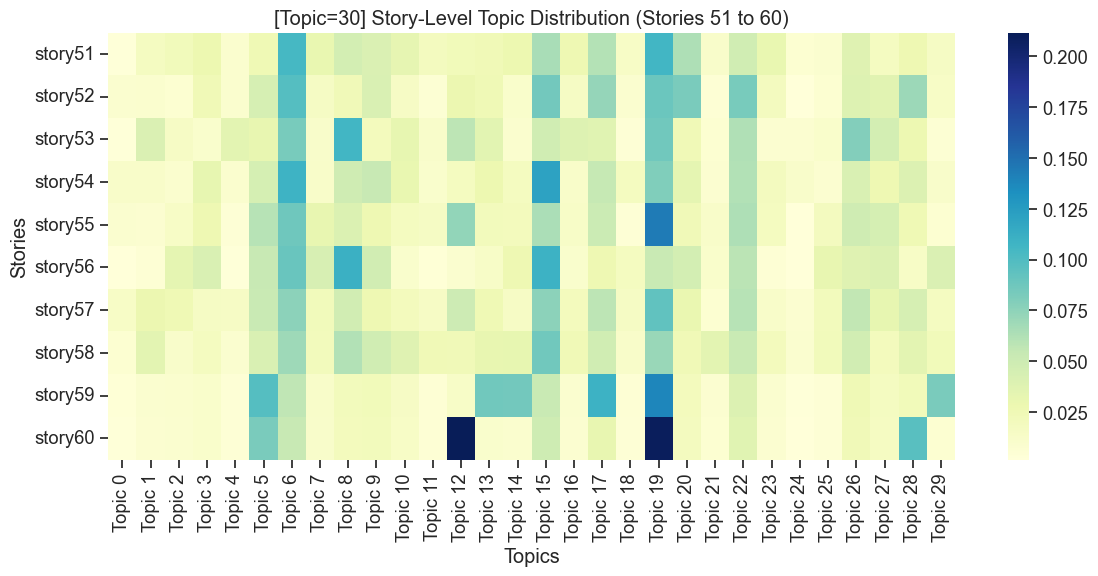

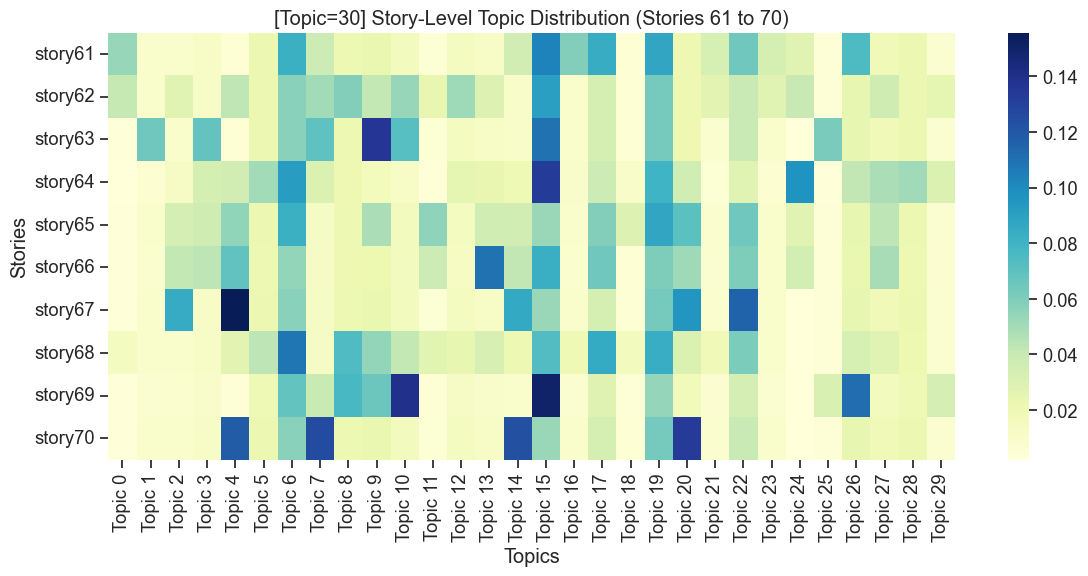

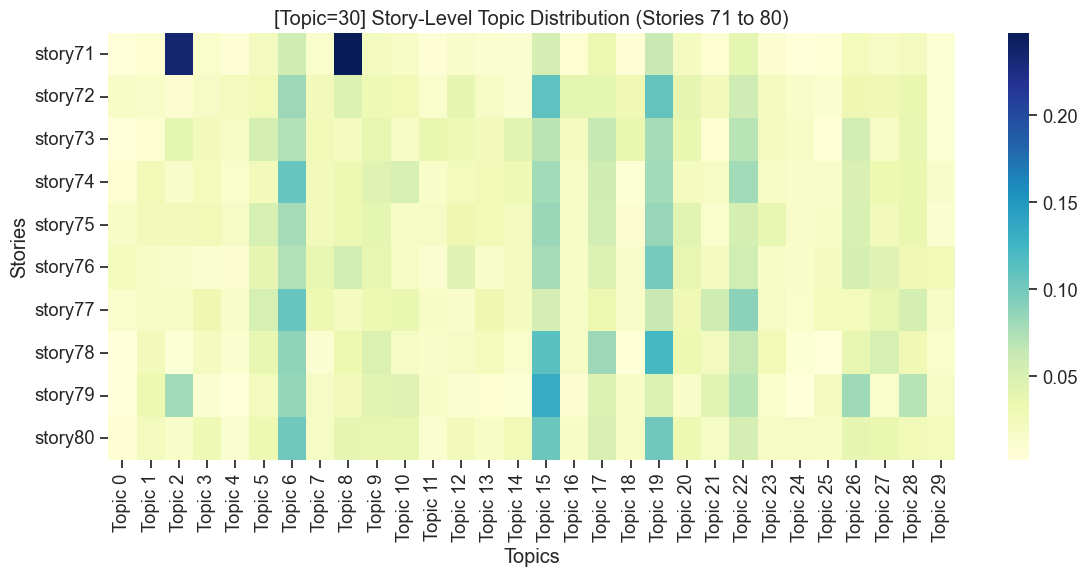

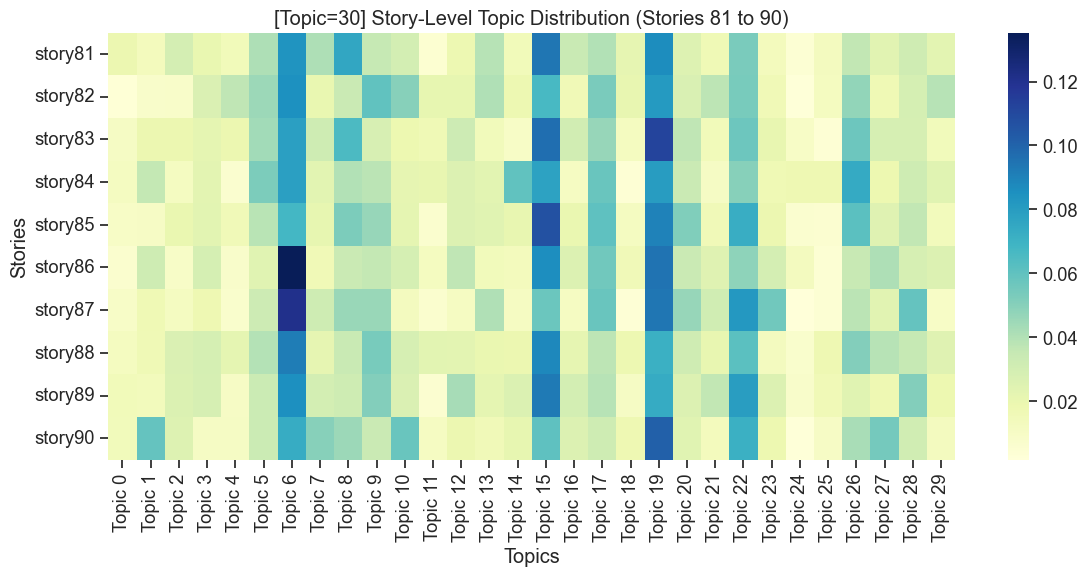

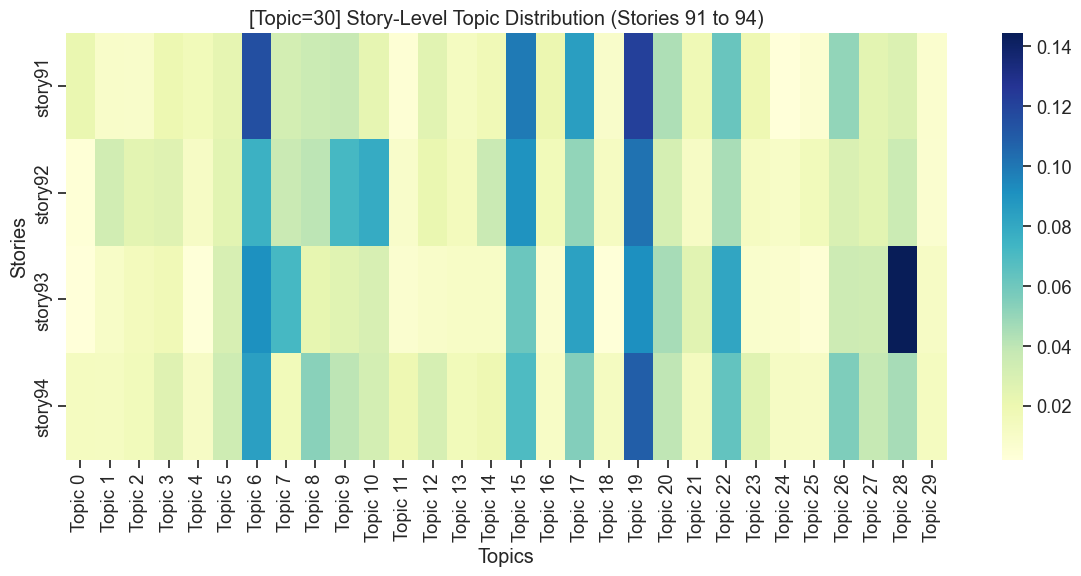

In [20]:
num_topics_30 = 30
output_30 = './output_30/'
topic_keys_30, topic_distributions_30 = lmw.quick_train_topic_model(
    path_to_mallet,
    output_30,
    num_topics_30,
    corpus
)

sentence_to_story_30 = sentence_to_story
story_topic_accumulator_30 = defaultdict(list)
for sent_story, topic_vec in zip(sentence_to_story_30, topic_distributions_30):
    story_topic_accumulator_30[sent_story].append(topic_vec)

story_level_topic_vectors_30 = {
    story: np.mean(distributions, axis=0)
    for story, distributions in story_topic_accumulator_30.items()
}
story_level_df_30 = pd.DataFrame.from_dict(story_level_topic_vectors_30, orient='index')
story_level_df_30.index.name = 'story'

df_sorted_30 = story_level_df_30.copy()
df_sorted_30['story_num'] = df_sorted_30.index.str.extract('(\d+)', expand=False).astype(int)
df_sorted_30 = df_sorted_30.sort_values('story_num')
df_sorted_30.index = ['story' + str(num) for num in df_sorted_30['story_num']]
df_sorted_30 = df_sorted_30.drop(columns='story_num')

for start in range(0, df_sorted_30.shape[0], 10):
    end = min(start + 10, df_sorted_30.shape[0])
    subset_df = df_sorted_30.iloc[start:end]
    plt.figure(figsize=(12, 6))
    sns.heatmap(subset_df, cmap='YlGnBu', xticklabels=[f"Topic {i}" for i in range(num_topics_30)], yticklabels=True)
    plt.title(f"[Topic=30] Story-Level Topic Distribution (Stories {start+1} to {end})")
    plt.xlabel("Topics")
    plt.ylabel("Stories")
    plt.tight_layout()
    plt.show


In [21]:
print("Topic Keywords for Topic = 15")
for i, t in enumerate(topic_keys_15):
    print(f"{i}\t" + ' '.join(t[:10]))

Topic Keywords for Topic = 15
0	nami call resource hope start book find april provide daniel
1	health mental illness hospital disorder service system treatment anxiety issue
2	life people way help try story think change thing work
3	time day year take come get long month see find
4	suicide prevention pain people need chronic research social work awareness
5	school know high get kid adult group tough run teacher
6	care know support person learn self safe thing need place
7	friend family son year love tell lose brother remember dad
8	bit little laugh meeting win response forget dad quick suffer
9	like feel know kind matter future emotion believe life different
10	die heart suicide depression pain struggle hold inside self sorry
11	experience suicide live thought attempt people suicidal story survive crisis
12	struggle walk effect level job offer smile live foot success
13	like yeah good get look speak sort people want come
14	know people think need like say want help thing talk


In [22]:
print("\nTopic Keywords for Topic = 25")
for i, t in enumerate(topic_keys_25):
    print(f"{i}\t" + ' '.join(t[:10]))


Topic Keywords for Topic = 25
0	know like get feel people think point lot suicidal time
1	hospital meeting new dream liam australia death logan admit wife
2	sign take strength real puzzle mother responsibility wave big part
3	day room man leave hour huge weight later lift hear
4	health mental illness hospital service challenge physical raise issue area
5	year son day old die love dad heart remember phone
6	suicide attempt prevention mean die conversation survive loss lose cause
7	know need people talk help okay say think support ask
8	yeah time look thank day today good want great get
9	life way work time try year change think find end
10	experience live care life people self suicide thought role peer
11	family friend love support good group give lose brother member
12	time get drink young house alcohol daughter pick see family
13	people story lot share hope community help want come start
14	body emotion light feel actually inside etc calm literally allow
15	like thing feel know sort 

In [23]:
print("\nTopic Keywords for Topic = 30")
for i, t in enumerate(topic_keys_30):
    print(f"{i}\t" + ' '.join(t[:10]))


Topic Keywords for Topic = 30
0	black lift man weight roof healing communication crazy chimney line
1	disorder anxiety trauma experience bipolar attack diagnose use depression recovery
2	die pain want inside cut cause face cancer death blame
3	care self emotional boundary like particularly navigate survive thrive responsibility
4	support walk calm cool offer past job collected leg memory
5	story people help share reach tell stay lot happen alive
6	like know feel thing people think lot kind want sense
7	suicide prevention attempt die loss space research number day awareness
8	son dad family year friend love lose remember child old
9	get day away good time leave point bad pass friend
10	health mental illness issue challenge problem hospital service physical condition
11	medication take stop doctor drink see half darkness hour psychiatrist
12	lot nami stigma hope start community sit power book group
13	school high lead program study award win push keep hate
14	day year old night sleep st